In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

### Introduction

In this project, we will analyze data on housing in Boston. This dataset provides information on various aspects of housing in different areas of Boston.

### Data Description

The Boston Housing dataset includes several variables such as median housing price, crime rate, proximity to employment, etc. These variables allow us to better understand the different factors influencing housing prices in the Boston area.

### Analysis Objectives

The objectives of this analysis are as follows:
- Understand the relationships between different variables and the median housing price.
- Identify the factors that have the most impact on housing prices in Boston.
- Provide recommendations for homebuyers or real estate investors based on the results of the analysis.

We will start by exploring the data and conducting statistical analyses to address these objectives.


### 1. Loading Data

In [55]:
#Reading the file containing the data
df = pd.read_csv('BostonHousing.csv',delimiter=';', decimal=',')
df.head()

,Unnamed: 0,cmedv,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,1,24.0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,2,21.6,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,3,34.7,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,4,33.4,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,5,36.2,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


The columns of the Boston Housing dataset represent various characteristics of housing in the Boston area. Here is the meaning of each column:

- **cmedv :**  Median value of owner-occupied homes in thousands of dollars.

- **crim :**  Per capita crime rate by town.

- **zn :**  Proportion of residential land zoned for lots over 25,000 square feet.

- **indus :**  Proportion of non-retail business acres per town.

- **nox :**  Nitric oxides concentration (parts per 10 million).

- **rm :**  Average number of rooms per dwelling.

- **age :**  Proportion of owner-occupied units built prior to 1940.

- **dis :**  Weighted distances to five Boston employment centers.

- **rad :**  Index of accessibility to radial highways.

- **tax :**  Full-value property tax rate per $10,000.

- **ptratio :**  Pupil-teacher ratio by town.

- **b :**  1000(Bk - 0.63)^2 where Bk is the proportion of Black residents by town.

- **lstat :**  Percentage of lower status of the population.

These columns provide various information about the housing characteristics and urban, socio-economic, and environmental environments of the Boston area, and are often used for analyses and predictive models in economic, urban, and real estate market studies.


### 2. Data Exploration
### Data mining

In [56]:
#number of rows and columns
df.shape

(506, 14)

In [57]:
# Displaying columns and total number of columns
df.columns, len(df.columns)

(Index(['Unnamed: 0', 'cmedv', 'crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis',
        'rad', 'tax', 'ptratio', 'b', 'lstat'],
       dtype='object'),
 14)

In [58]:
# Removed Unnamed: 0 titles column
df.drop("Unnamed: 0",axis=1,inplace=True)

In [59]:

# Dataframe columns after removing the 'Obs' column
df.columns

Index(['cmedv', 'crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

In [60]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cmedv    506 non-null    float64
 1   crim     506 non-null    float64
 2   zn       506 non-null    float64
 3   indus    506 non-null    float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 51.5 KB


In [61]:

# Show the number of missing data following each column
df.isna().sum()

cmedv      0
crim       0
zn         0
indus      0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
dtype: int64

In [62]:
# Column type
df.dtypes

# We don't notice object types so we need to correct them

cmedv      float64
crim       float64
zn         float64
indus      float64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
dtype: object

In [63]:
# Summury Statistics
df.describe()
#The statistics show us for each features the number of lines, the average or expectation,
# the minimum, the maximum, the quartile 1 (25%), the median, the quartile3

,cmedv,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,9.182176,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,21.200000,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,25.000000,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,50.000000,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


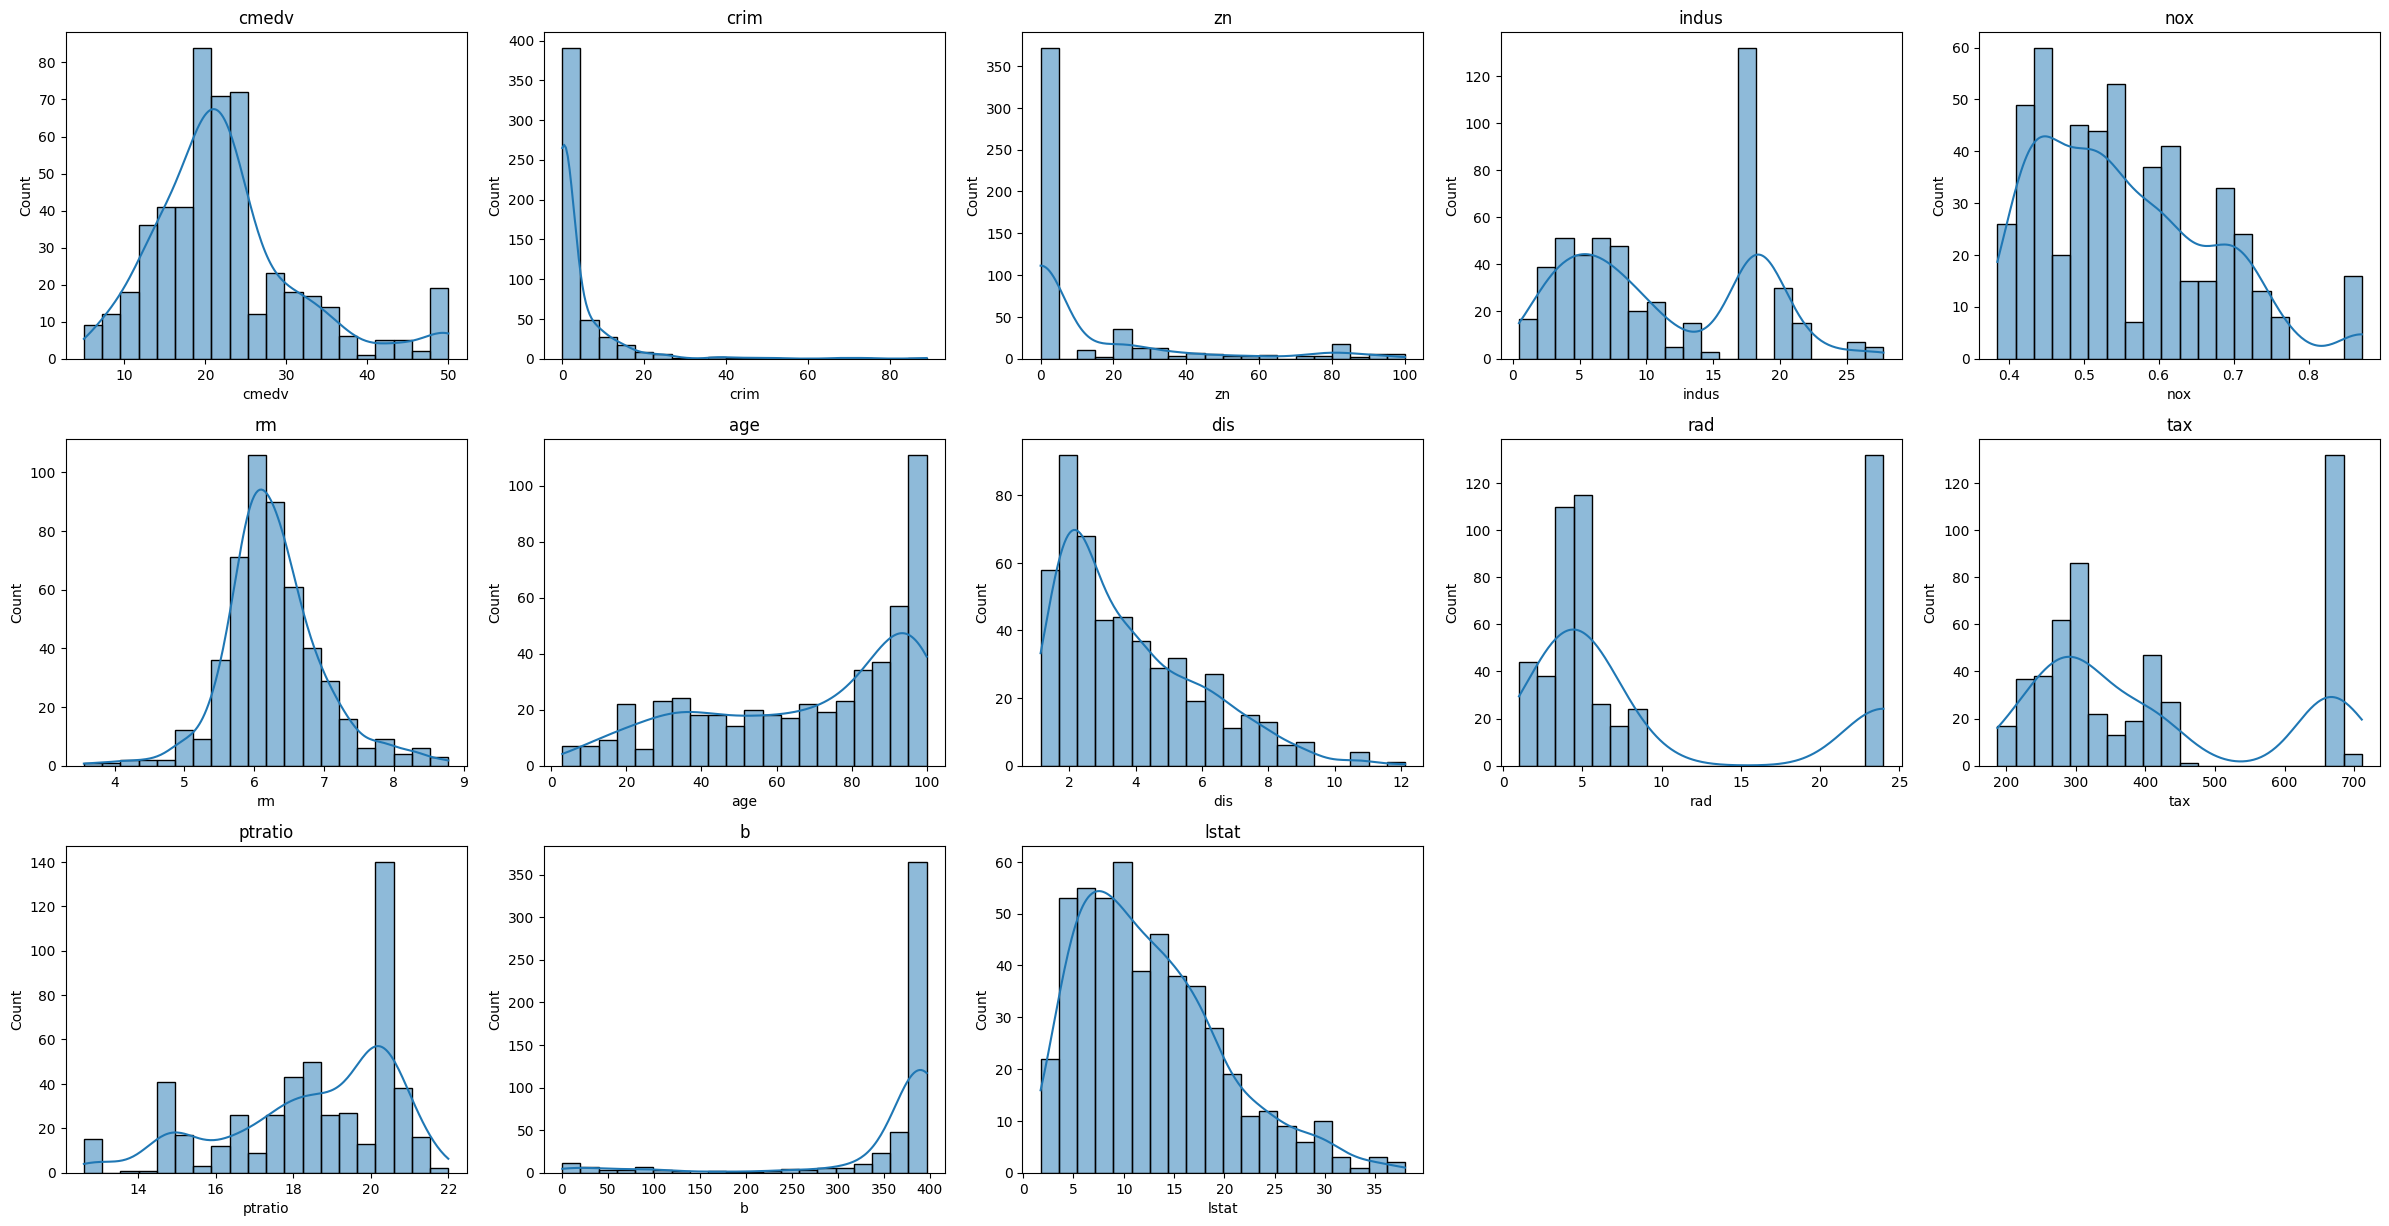

In [64]:
# Histogram
plt.figure(figsize=(24, 16))
for feature in df.columns.to_list():
    plt.subplot(4, 5, df.columns.to_list().index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

 **Correlation Coefficients:** We computed the correlation coefficients to understand the relationships between the features and the target variable (`cmedv`), which is the median value of owner-occupied homes.
 
 The correlation matrix provides insights into how each feature is related to one another and to the target variable, helping to identify potential multicollinearity and the most influential features.

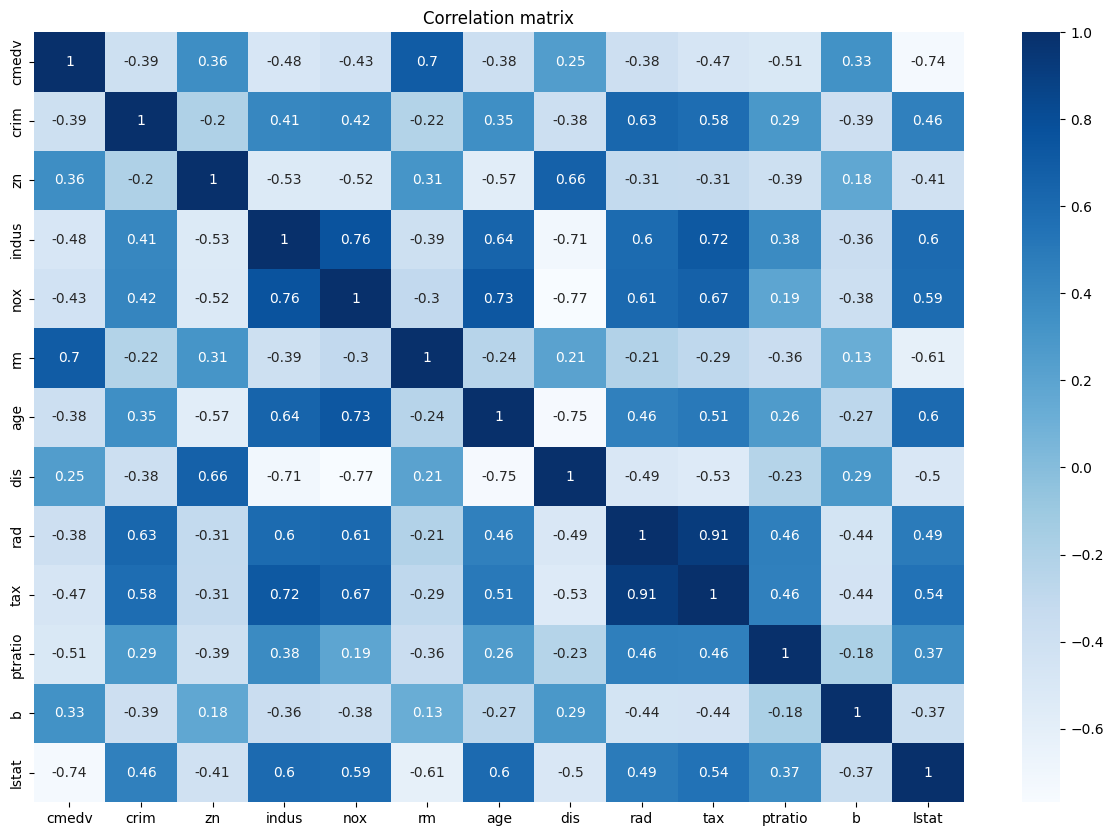

In [65]:

# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation matrix')
plt.show()

### 3. Normalization of data
To prepare the data for modeling, we normalized the features to ensure that each has a mean of 0 and a standard deviation of 1. This step is crucial for improving the performance of many machine learning algorithms by ensuring that each feature contributes equally to the model.

In [66]:

# Data normalization with scikit-learn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
normalized_data = scaler.transform(df)

normalized_df = pd.DataFrame(data = normalized_data, columns = df.columns.to_list())
normalized_df.head()

,cmedv,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.160376,-0.419782,0.284830,-1.287909,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.101258,-0.417339,-0.487722,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,1.326830,-0.417342,-0.487722,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,1.185112,-0.416750,-0.487722,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,1.490352,-0.412482,-0.487722,-1.306878,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


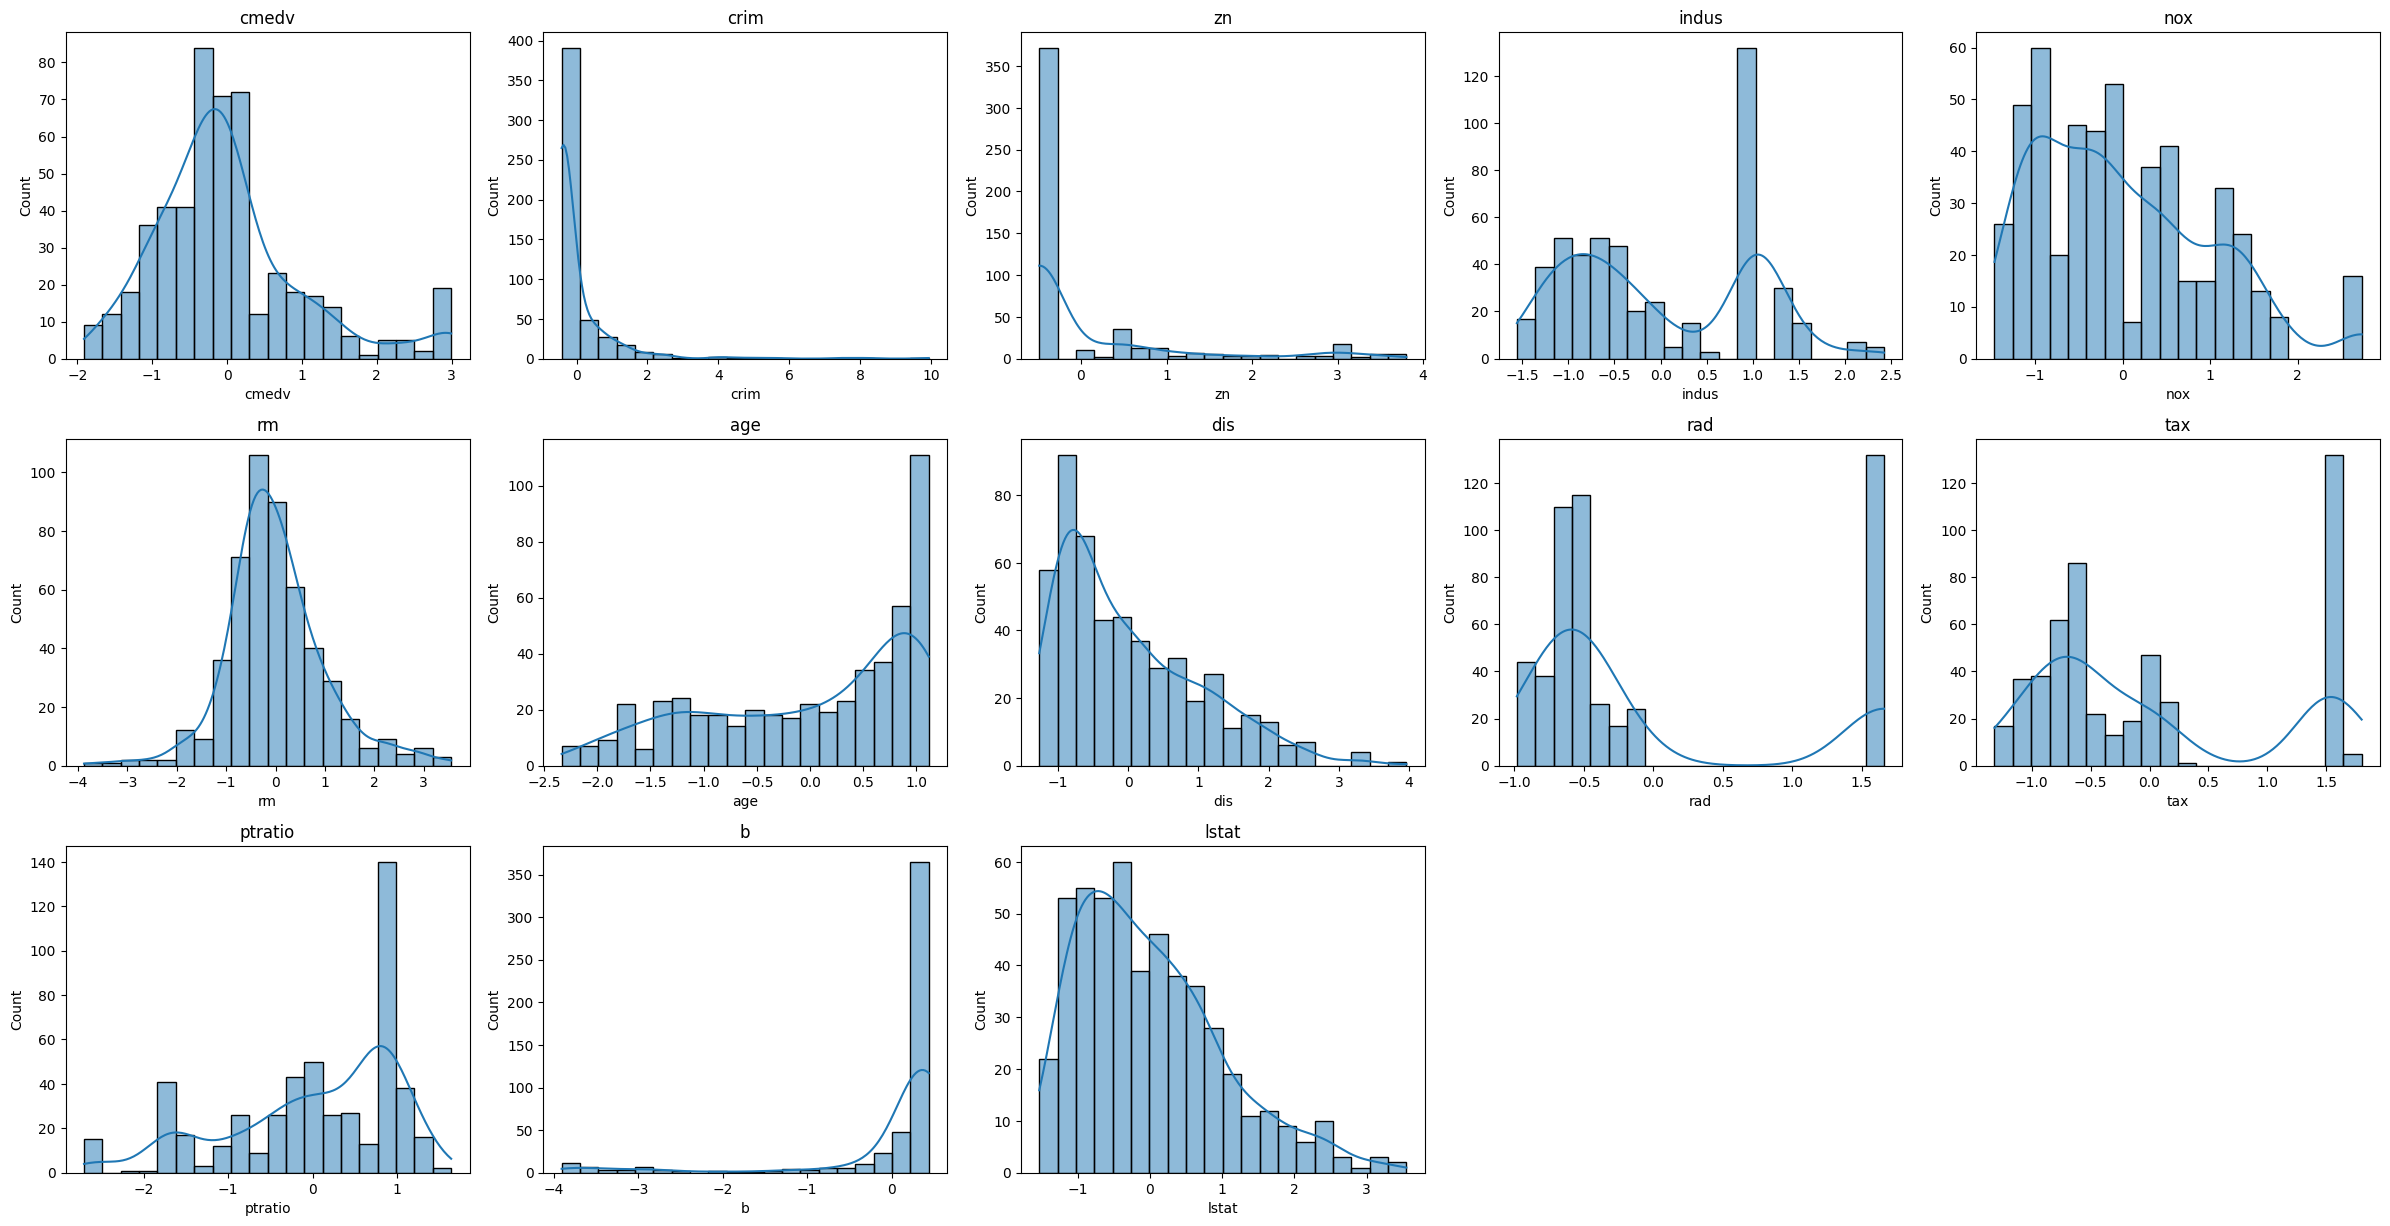

In [67]:
# Histogram
plt.figure(figsize=(24, 16))
for feature in normalized_df.columns.to_list():
    plt.subplot(4, 5, normalized_df.columns.to_list().index(feature) + 1)
    sns.histplot(data=normalized_df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

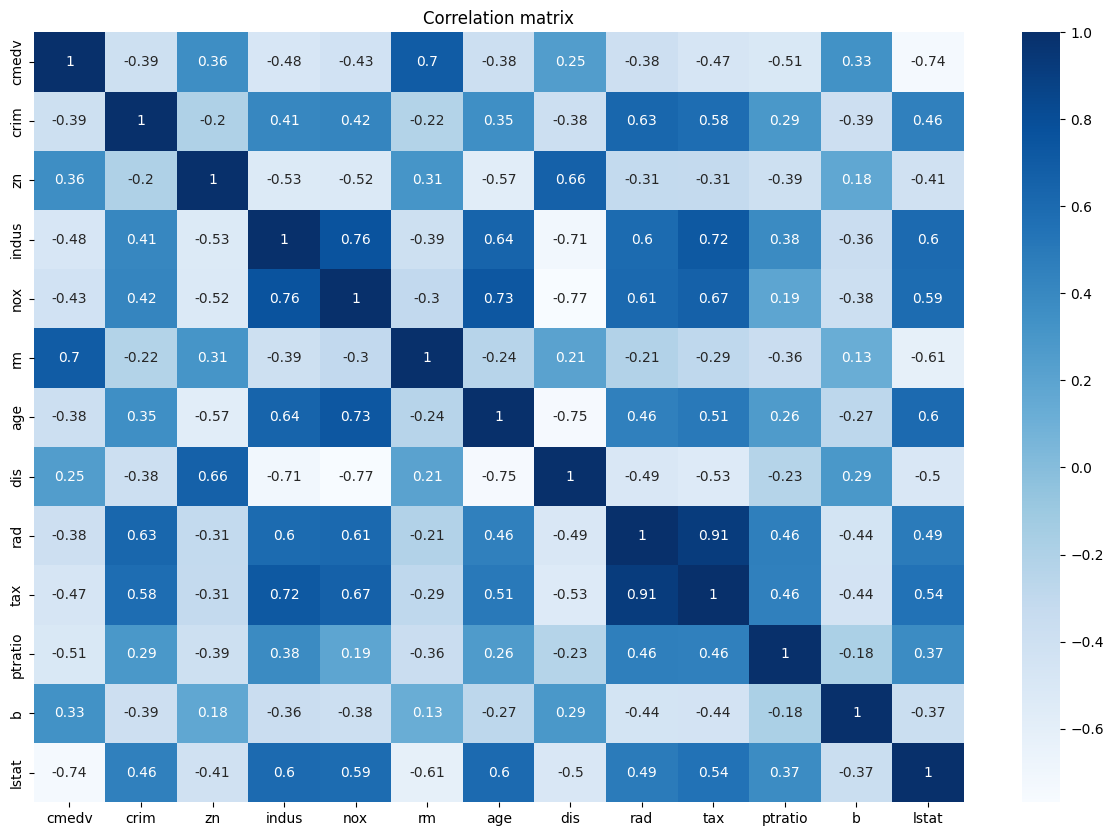

In [68]:
# Correlation matrix after data normalization
correlation_matrix = normalized_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation matrix')
plt.show()

### 4. Model Training and Evaluation With RandomForest

In this section, we will train and evaluate a machine learning model using the `RandomForestRegressor` from the `sklearn` library. The steps include:

- **Feature Selection:** Targeting the characteristic `cmedv` (median value of owner-occupied homes) and using other relevant features for the model.

- **Splitting the Data:** Dividing the dataset into training and testing sets to evaluate the model's performance.
-  **Training the Model:** Fitting a Random Forest Regressor to the training data.
- **Evaluating the Model:** Assessing the model's performance on the test set using the R^2 score and Root Mean Squared Error (RMSE).

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


y = normalized_df['cmedv']
# selected_features = ['rm','lstat','ptratio', 'dis','crim','nox','age','tax']
# X_selected = normalized_df[selected_features]
X_selected = normalized_df.drop(columns=['cmedv'])

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train,y_train)

model_score = model.score(X_test, y_test)
print("Score : ", model_score)

y_pred = model.predict(X_test)

# Calculate performance metrics.
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE :", rmse)


Score :  0.8768540792746902
RMSE : 0.32851718339562463


#### Results interpretation
- **Model score:** Indicates the proportion of variance explained by the model. The closer the score is to 1, the better the model.
- **RMSE (Root Mean Squared Error):** Indicates the root mean square error between the predicted values ​​and the actual values. A lower RMSE means better model performance.

### 5- Statistical Analysis
we will perform a statistical analysis of housing data in Boston. We will explore the relationships between different variables and identify the factors that influence housing prices.


- Hypothesis Testing (ANOVA)
We test whether median housing price (cmedv) differs significantly across different levels of the weighted distance to five Boston employment centers (dis).

In [70]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Hypothesis Testing
model = ols('cmedv ~ C(dis)', data=normalized_df).fit()
table_anova = sm.stats.anova_lm(model, typ=2)
print("\nTable ANOVA :")
print(table_anova)


Table ANOVA :
              sum_sq     df         F        PR(>F)
C(dis)    482.138886  411.0  4.621335  7.714326e-16
Residual   23.861114   94.0       NaN           NaN


- Regression Analysis

We perform linear regression to model the relationship between median house price (cmedv) and other variables such as average number of rooms (rm), percentage of low status population (lstat), and weighted distance towards five employment centers (dis).

In [71]:

# Regression Analysis
# Perform Linear Regression
# Define the dependent variable (y) and independent variables (X)
X = normalized_df[['rm', 'lstat', 'dis']]  
print(X)

           rm     lstat       dis
0    0.413672 -1.075562  0.140214
1    0.194274 -0.492439  0.557160
2    1.282714 -1.208727  0.557160
3    1.016303 -1.361517  1.077737
4    1.228577 -1.026501  1.077737
..        ...       ...       ...
501  0.439316 -0.418147 -0.625796
502 -0.234548 -0.500850 -0.716639
503  0.984960 -0.983048 -0.773684
504  0.725672 -0.865302 -0.668437
505 -0.362767 -0.669058 -0.613246

[506 rows x 3 columns]


A constant is added to the model to estimate the intercept.
`The intercept` represents the value of the `dependent variable (Y)` when all `independent variables(X)` are equal to zero.

In [72]:
# Add a constant to the matrix of independent variables X (intercept)
X = sm.add_constant(X)
print(X)


     const        rm     lstat       dis
0      1.0  0.413672 -1.075562  0.140214
1      1.0  0.194274 -0.492439  0.557160
2      1.0  1.282714 -1.208727  0.557160
3      1.0  1.016303 -1.361517  1.077737
4      1.0  1.228577 -1.026501  1.077737
..     ...       ...       ...       ...
501    1.0  0.439316 -0.418147 -0.625796
502    1.0 -0.234548 -0.500850 -0.716639
503    1.0  0.984960 -0.983048 -0.773684
504    1.0  0.725672 -0.865302 -0.668437
505    1.0 -0.362767 -0.669058 -0.613246

[506 rows x 4 columns]


We create and fit the `linear regression model`.

In [73]:
#Selects the dependent variable
y = normalized_df['cmedv']

# Fit the regression model
model = sm.OLS(y, X).fit()

#Print the summary of the regression model
print("\nRegression Analysis Summary:")
print(model.summary())


Regression Analysis Summary:
                            OLS Regression Results                            
Dep. Variable:                  cmedv   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     312.4
Date:                Thu, 30 May 2024   Prob (F-statistic):          2.23e-114
Time:                        09:06:21   Log-Likelihood:                -451.51
No. Observations:                 506   AIC:                             911.0
Df Residuals:                     502   BIC:                             927.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.606e-16 

##### Explanation
We performed a linear regression to model the relationship between the median housing price (`cmedv`) and several explanatory variables such as the average number of rooms (`rm`), the percentage of the population with low status (`lstat` ), and the weighted distance to five employment centers (`dis`). Here are the main results obtained:

- **Regression Coefficient: (`coef`)**
  - The regression coefficient for each explanatory variable indicates how the median house price changes in response to a one-unit change in that variable, while holding other variables constant.

- **P-value: (`P>|t|`)**
  - The p-value associated with each regression coefficient indicates whether the coefficient is statistically significant. **A low p-value** (generally < 0.05) **suggests strong statistical** significance.

- **Confidence Interval:(`[0.025  0.975]`)**
  - The confidence interval for each regression coefficient gives us a plausible range of values ​​for that coefficient with a certain confidence level ().

### *Eg. Figures*
- ***Scatterplot between 'dis' and 'cmedv'***<br>
This scatter plot shows the relationship between the weighted distances to five Boston employment centers (dis) and the median housing prices (cmedv).<br>
`A regression line` is added to visualize `the trend`.

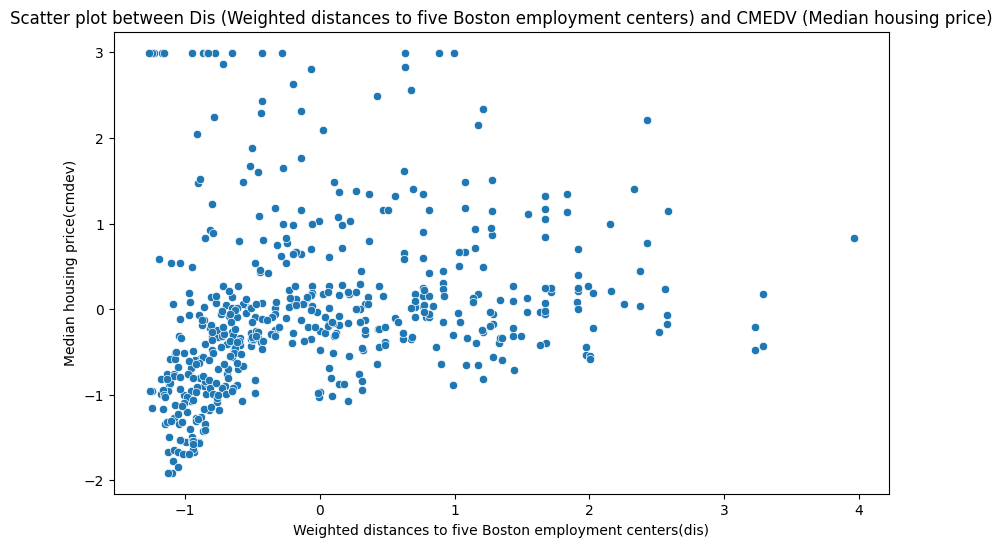

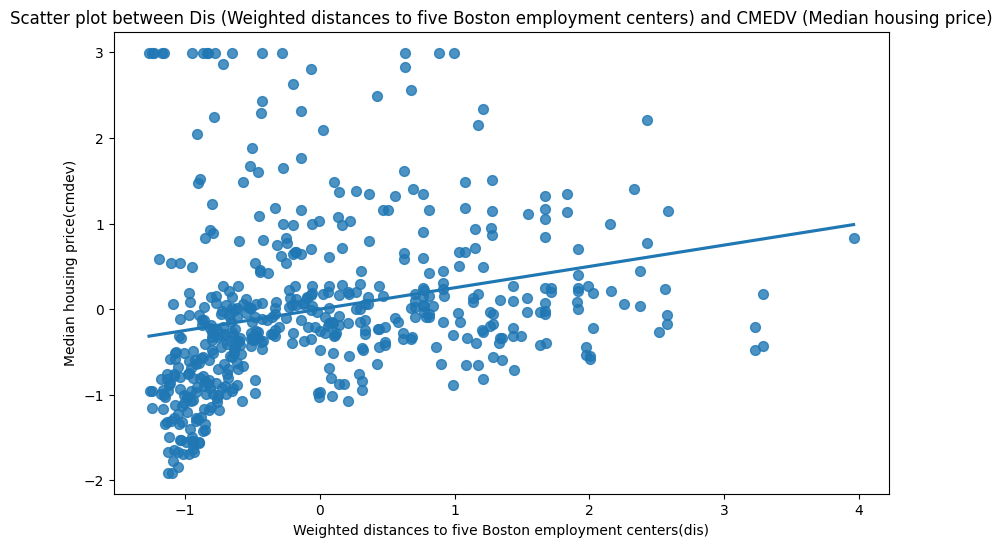

In [74]:
# Scatterplot between 'rm' and 'cmedv'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=normalized_df['dis'], y=normalized_df['cmedv'])
# sns.regplot(x='dis', y='cmedv', data=normalized_df, ci=None, scatter_kws={'s': 50})
plt.title('Scatter plot between Dis (Weighted distances to five Boston employment centers) and CMEDV (Median housing price)')
plt.xlabel('Weighted distances to five Boston employment centers(dis)')
plt.ylabel('Median housing price(cmdev)')
plt.show()

plt.figure(figsize=(10, 6))
# sns.scatterplot(x=normalized_df['dis'], y=normalized_df['cmedv'])
sns.regplot(x='dis', y='cmedv', data=normalized_df, ci=None, scatter_kws={'s': 50})
plt.title('Scatter plot between Dis (Weighted distances to five Boston employment centers) and CMEDV (Median housing price)')
plt.xlabel('Weighted distances to five Boston employment centers(dis)')
plt.ylabel('Median housing price(cmdev)')
plt.show()

- ***Boxplot of Median Housing Prices by 'dis'***<br>
This box plot shows the distribution of median housing prices (cmedv) for different levels of weighted distances to five Boston employment centers (dis). It provides a summary of the price distribution including median, quartiles, and potential outliers.

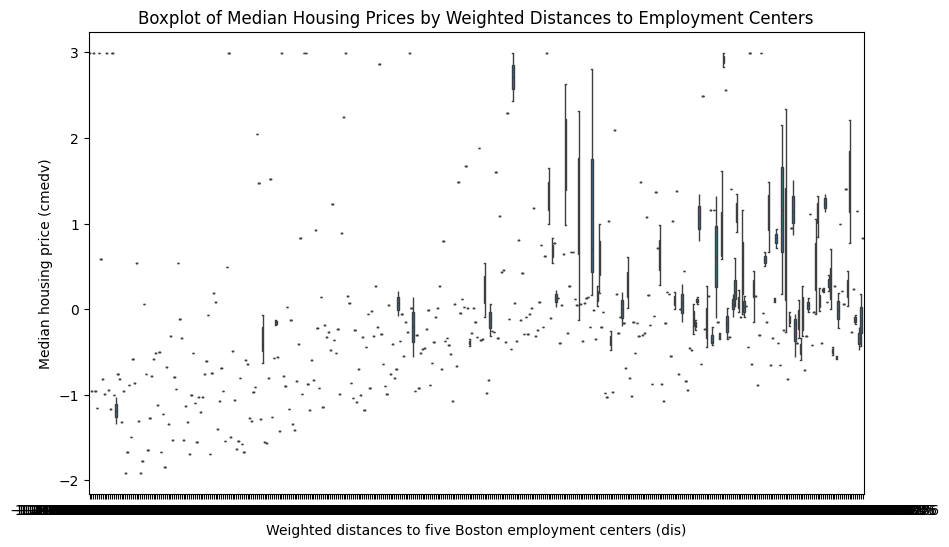

In [75]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='dis', y='cmedv', data=normalized_df)
plt.title('Boxplot of Median Housing Prices by Weighted Distances to Employment Centers')
plt.xlabel('Weighted distances to five Boston employment centers (dis)')
plt.ylabel('Median housing price (cmedv)')
plt.show()

## Explanation of Parallel Coordinate Analysis
A parallel coordinate chart is a powerful tool for visualizing relationships between multiple variables. Each line represents an observation in the dataset, and the parallel axes represent the different variables. This allows the trajectories of each observation to be compared across all variables simultaneously.

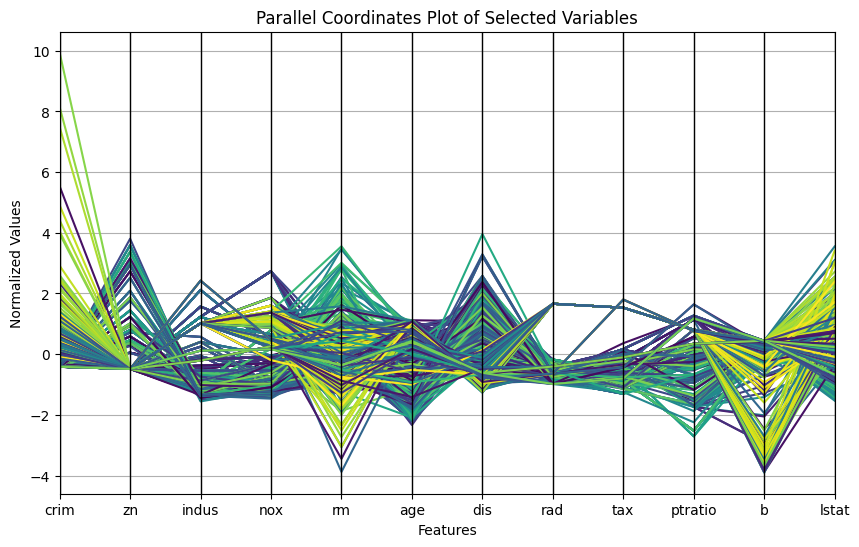

In [113]:
from pandas.plotting import parallel_coordinates

# Coordonnées parallèles Chart
plt.figure(figsize=(10, 6))
parallel_coordinates(normalized_df, class_column='cmedv', colormap='viridis')
plt.title('Parallel Coordinates Plot of Selected Variables')
plt.xlabel('Features')
plt.ylabel('Normalized Values')
#plt.legend(loc='upper left').set_visible(False)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title='cmedv').set_visible(False)
plt.show()

#### *Interpretation*
The parallel coordinate plot shows how different observations `(each line)` behave across multiple variables. Here are a few things to note:

- **Observation trajectories:**
Each row represents an observation from the dataset. You can observe the paths of the lines to see how different observations vary depending on the variables.

- **Identification of relationships:**
This chart helps identify relationships between variables. <br>
*For example, if several lines often intersect at specific points, this may indicate a relationship between these variables.*

- **Pattern detection:**
Patterns or trends can be detected by observing groups of lines that follow similar trajectories.

This type of visualization is particularly useful for exploratory data analyses, allowing you to quickly identify relationships or anomalies in the dataset.

### Conclusion
In summary, we explored Boston housing data, conducted hypothesis testing to assess the impact of different variables on housing prices, and performed regression analysis to model the relationship between median housing price and other variables.